In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Data

In [30]:
m, b = np.random.uniform(-5, 5, 2)  # Generates two random values in [-5, 5]
x = np.arange(-5, 5, 0.1)
Y = m * x + b + np.random.randn(*x.shape)  # Adds Gaussian noise

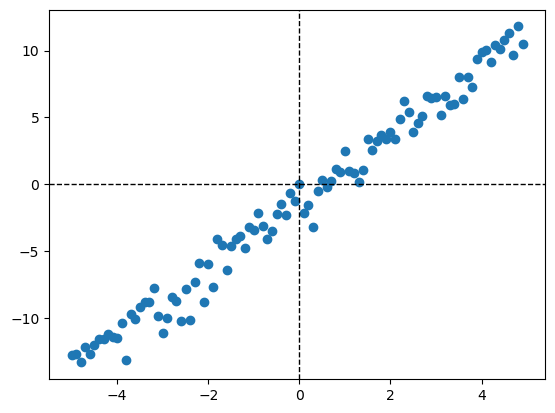

In [32]:
plt.scatter( x, Y, color="tab:blue", label="data")

plt.axhline(0, color='black', linestyle='--', linewidth=1)  # y = 0 line
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # x = 0 line
plt.show()

# implementation

In [60]:
X = np.column_stack((np.ones_like(x), x))

start_time = time.time()
Betas = np.linalg.inv( X.T @ X ) @ X.T @ Y
end_time = time.time()

print(f"Tiempo de ejecución: {(end_time - start_time):.10f} segundos")
print("Betas: ",Betas)
print("m: ",Betas[1])
print("b: ",Betas[0])

Tiempo de ejecución: 0.0000000000 segundos
Betas:  [-1.28430049  2.50388332]
m:  2.5038833169009154
b:  -1.2843004934334097


In [41]:
y_pred = x * Betas[1] + Betas[0]

In [43]:
# errors
mse = mean_squared_error(Y, y_pred)  # Mean Squared Error
mae = mean_absolute_error(Y, y_pred)  # Mean Absolute Error
r2 = r2_score(Y, y_pred)  # R² Score

print("Errors:")
print(f"Mean Squared Error (MSE): {mse:.4f}") # promedio de los errores elevados al cuadrado
print(f"Mean Absolute Error (MAE): {mae:.4f}") # promedio de los errores absolutos entre los valores reales y los predichos
print(f"R² Score: {r2:.4f}") # Mide qué tan bien el modelo explica la variabilidad de los datos [0,1].

Errors:
Mean Squared Error (MSE): 1.0230
Mean Absolute Error (MAE): 0.8191
R² Score: 0.9808


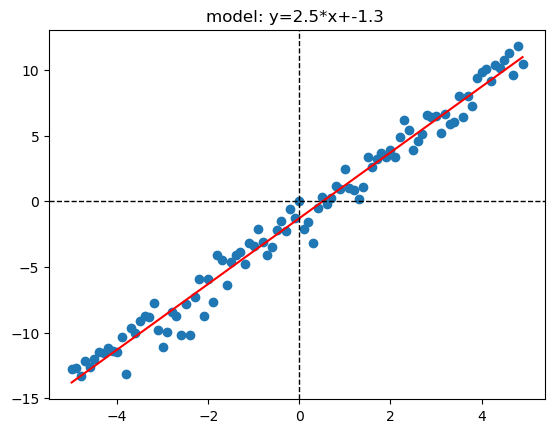

In [47]:
plt.scatter( x, Y, color="tab:blue", label="data")
plt.plot( x, y_pred, color="r", label="model")
plt.title(f"model: y={Betas[1]:.2}*x+{Betas[0]:.2} ")

plt.axhline(0, color='black', linestyle='--', linewidth=1)  # y = 0 line
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # x = 0 line
plt.show()

# Library

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [52]:
X = x.reshape(-1,1)

start_time = time.time()
model = LinearRegression()
model.fit(X,Y)

end_time = time.time()

print(f"Tiempo de ejecución: {(end_time - start_time):.10f} segundos")
print("Solutions: ")
print(f"Intercepto: {model.intercept_:.3}")
print(f"Coeficientes: {model.coef_[0]:.3}")

Tiempo de ejecución: 0.0009970665 segundos
Solutions: 
Intercepto: -1.28
Coeficientes: 2.5


In [54]:
# predicciones
y_pred = model.predict(X)

In [56]:
# errors
mse = mean_squared_error(Y, y_pred)  # Mean Squared Error
mae = mean_absolute_error(Y, y_pred)  # Mean Absolute Error
r2 = r2_score(Y, y_pred)  # R² Score

print("Errors:")
print(f"Mean Squared Error (MSE): {mse:.4f}") # promedio de los errores elevados al cuadrado
print(f"Mean Absolute Error (MAE): {mae:.4f}") # promedio de los errores absolutos entre los valores reales y los predichos
print(f"R² Score: {r2:.4f}") # Mide qué tan bien el modelo explica la variabilidad de los datos [0,1].

Errors:
Mean Squared Error (MSE): 1.0230
Mean Absolute Error (MAE): 0.8191
R² Score: 0.9808


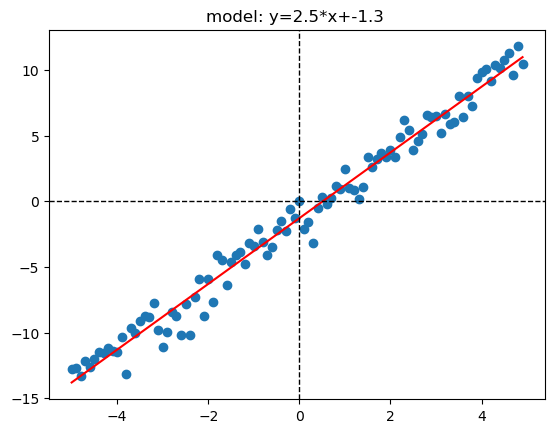

In [58]:
plt.scatter( x, Y, color="tab:blue", label="data")
plt.plot( x, y_pred, color="r", label="model")
plt.title(f"model: y={model.coef_[0]:.2}*x+{model.intercept_:.2} ")

plt.axhline(0, color='black', linestyle='--', linewidth=1)  # y = 0 line
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # x = 0 line
plt.show()